In [86]:
using Pkg
using Statistics

In [43]:
Pkg.add("PyPlot")

    Updating registry at `~/.julia/registries/MimiRegistry`
    Updating git-repo `https://github.com/mimiframework/MimiRegistry.git`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/Library/CloudStorage/OneDrive-M365UniversitätHamburg/Semester 4/Environmental Economics/M3 Project/Code/Project.toml`
  [d330b81b] + PyPlot v2.11.2
  No Changes to `~/Library/CloudStorage/OneDrive-M365UniversitätHamburg/Semester 4/Environmental Economics/M3 Project/Code/Manifest.toml`


In [47]:
using JLD2
using Plots
using LaTeXStrings
using PyPlot

┌ Info: Installing matplotlib via the Conda matplotlib package...
└ @ PyCall /Users/adhitchandy/.julia/packages/PyCall/1gn3u/src/PyCall.jl:719
┌ Info: Running `conda install -y matplotlib` in root environment
└ @ Conda /Users/adhitchandy/.julia/packages/Conda/sDjAP/src/Conda.jl:181


Retrieving notices: ...working... done
Channels:
 - defaults
 - conda-forge
Platform: osx-arm64
Solving environment: ...working... done




==> WARNING: A newer version of conda exists. <==
    current version: 24.3.0
    latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c conda-forge conda





## Package Plan ##

  environment location: /Users/adhitchandy/.julia/conda/3/aarch64

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.0.7               |       hc377ac9_0         379 KB
    contourpy-1.2.0            |  py310h48ca7d4_0         238 KB
    cycler-0.11.0              |     pyhd3eb1b0_0          12 KB
    fonttools-4.51.0           |  py310h80987f9_0         2.4 MB
    freetype-2.12.1            |       h1192e45_0         570 KB
    jpeg-9e                    |       h80987f9_1         248 KB
    kiwisolver-1.4.4           |  py310h313beb8_0          61 KB
    lcms2-2.12                 |       hba8e193_0         273 KB
    lerc-3.0                   |       hc377ac9_0         115 KB
    libdeflate-1.8             |       h1a28f6b_5          35 KB
    libpng-1.6.39              |       h80987f9_0         283 KB
    libti

## AD-DICE Model Plots

In [2]:
YAD = JLD2.load("./AD_DICE/ygrossAD.jld2")["ygross"];

### AD DICE componenets

In [74]:
Prot = JLD2.load("./AD_DICE/adaptationcostAD.jld2")["adaptation"]
D = JLD2.load("./AD_DICE/damagesAD.jld2")["damages"]
GD = JLD2.load("./AD_DICE/grossdamagesAD.jld2")["grossdamages"]
RD = JLD2.load("./AD_DICE/residualdamageAD.jld2")["residualdamage"]
B = GD .- RD

years = collect(2015:5:2510);

### Extension components calibrated f=1

In [6]:
Pexc1 = JLD2.load("./Extension/costEXcalib1.jld2")["costEXcalib1"]
Dexc1 = JLD2.load("./Extension/damagesEXcalib1.jld2")["damagesEXcalib1"]
GDexc1 = JLD2.load("./Extension/grossdamagesEXcalib1.jld2")["grossdamagesEXcalib1"]
RDexc1 = JLD2.load("./Extension/residualdamageEXcalib1.jld2")["residualdamageEXcalib1"];
Bexc1 = JLD2.load("./Extension/benefitEXcalib1.jld2")["benefitEXcalib1"];

### Extension components calibrated f=0.5

In [7]:
Pexc50 = JLD2.load("./Extension/costEXcalib50.jld2")["costEXcalib50"]
Dexc50 = JLD2.load("./Extension/damagesEXcalib50.jld2")["damagesEXcalib50"]
GDexc50 = JLD2.load("./Extension/grossdamagesEXcalib50.jld2")["grossdamagesEXcalib50"]
RDexc50 = JLD2.load("./Extension/residualdamageEXcalib50.jld2")["residualdamageEXcalib50"];
Bexc50 = JLD2.load("./Extension/benefitEXcalib50.jld2")["benefitEXcalib50"];

### Extension components calibrated f=0

In [72]:
Pexc0 = JLD2.load("./Extension/costEXcalib0.jld2")["costEXcalib0"]
Dexc0 = JLD2.load("./Extension/damagesEXcalib0.jld2")["damagesEXcalib0"]
GDexc0 = JLD2.load("./Extension/grossdamagesEXcalib0.jld2")["grossdamagesEXcalib0"]
RDexc0 = JLD2.load("./Extension/residualdamageEXcalib0.jld2")["residualdamageEXcalib0"];
Bexc0 = JLD2.load("./Extension/benefitEXcalib0.jld2")["benefitEXcalib0"];

In [ ]:
calib1 = (0.33*GDext0)./Protext0
@save "calib1.jld2" calib1


### Residual Damage, Adaptatioin Cost & Gross Damages

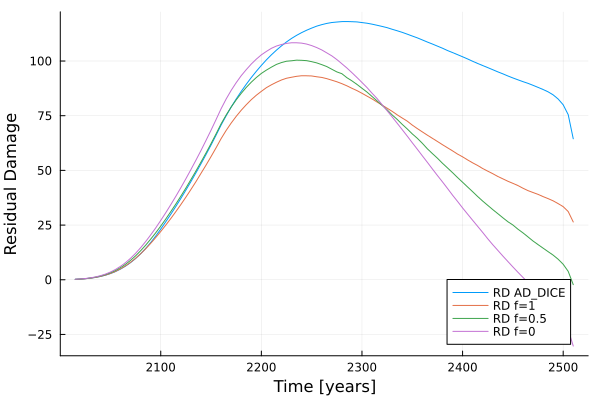

In [20]:
period = 1:100
plot(years[period], [RD[period] RDexc1[period] RDexc50[period] RDexc0[period]], label=["RD AD_DICE" "RD f=1" "RD f=0.5" "RD f=0"], ylabel="Residual Damage", xlabel="Time [years]", legend=:bottomright)

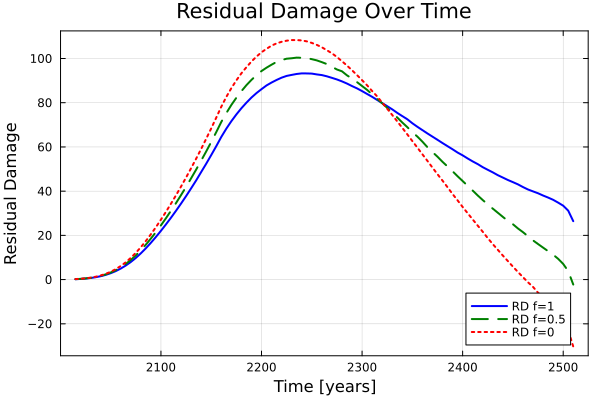

In [22]:
# Plotting with enhancements
plot(
    years[period], 
    [RDexc1[period] RDexc50[period] RDexc0[period]], 
    label = ["RD f=1" "RD f=0.5" "RD f=0"],
    ylabel = "Residual Damage",
    xlabel = "Time [years]",
    legend = :bottomright,
    title = "Residual Damage Over Time",
    lw = 2,  # line width
    lc = [:blue :green :red],  # line colors
    ls = [:solid :dash :dot],  # line styles
    grid = :on,  # turn on grid
    framestyle = :box
)

In [84]:
period = 1:20
b = plot(
    years[period], 
    [Bexc1[period] Bexc50[period] Bexc0[period] B[period]], 
    label = ["Only Flow Adaptation" "Both Flow & Stock at equal rates" "Only Stock Adaptation" "AD-DICE"],
    ylabel = "Benefit in trillion dollars",
    xlabel = "Time [years]",
    legend = :topleft,
    lw = 2,  # line width
    lc = [:blue :green :red :black],  # line colors
    ls = [:solid :dash :dot],  # line styles
    grid = :on,  # turn on grid
    framestyle = :box
)
Plots.savefig(b, "benefitsindollars.png")

"/Users/adhitchandy/Library/CloudStorage/OneDrive-M365UniversitätHamburg/Semester 4/Environmental Economics/M3 Project/Code/benefitsindollars.png"

### Cost to benefit ratio

In [75]:
r0 = Pexc0./Bexc0;
r50 = Pexc50 ./ Bexc50;
r1 = Pexc1 ./ Bexc1;
rAD = Prot ./ B;


In [64]:
period = 1:100

1:100

In [79]:
bcr = plot(
    years[period], 
    [r1[period] r50[period] r0[period] rAD[period]], 
    label = ["Only Flow Adaptation" "Budget shared equally between flow & stock" "Only Stock Adaptation" "AD-DICE BCR"],
    ylabel = "Cost Benefit ratio",
    xlabel = "Time [years]",
    legend = :topright,
    lw = 2,  # line width
    lc = [:blue :green :red :black],  # line colors
    ls = [:solid :dash :dot],  # line styles
    grid = :on,  # turn on grid
    framestyle = :box
)
#Plots.savefig(b, "cbr.png")
Plots.savefig(bcr, "bcr.png")

"/Users/adhitchandy/Library/CloudStorage/OneDrive-M365UniversitätHamburg/Semester 4/Environmental Economics/M3 Project/Code/bcr.png"

In [97]:
r1mean = mean(r1)


0.553466150105004

In [98]:
r50mean = mean(r50)


0.5016640179452535

In [99]:
r0mean = mean(r0)


0.6503605084839985

In [100]:
rADmean = mean(rAD)

0.33352557581889314

In [103]:
tBAD = sum(B)/sum(Prot)


3.714533264008126

In [106]:
tB0 = sum(Bexc0)/sum(Pexc0)

2.501307295740805

In [107]:
tB50 = sum(Bexc50)/sum(Pexc50)

2.241288915488216

In [108]:
tB1 = sum(Bexc1)/sum(Pexc1)

1.9812705352356257

### before and after calibration

In [28]:
RDexc0 = JLD2.load("./Extension/residualdamageEXcalib1.jld2")["residualdamageEXcalib1"]
RDex0 = JLD2.load("./Extension/residualdamageEX1.jld2")["residualdamageEX1"];



In [57]:
period = 1:100

1:100

In [70]:
p = plot(
    years[period], 
    [RD[period] RDexc0[period] RDex0[period]], 
    label = ["AD-DICE" "Residual damage after calibration, omega=1" "Residual damage before calibration, omega=1"],
    ylabel = "Residual damage in trillion dollars(2010)",
    xlabel = "Time [years]",
    legend = :topleft,
    lw = 2,  # line width
    lc = [:blue :green :red],  # line colors
    ls = [:solid :dash :dot],  # line styles
    grid = :on,  # turn on grid
    framestyle = :box
)
Plots.savefig(p, "calibration2.png")

"/Users/adhitchandy/Library/CloudStorage/OneDrive-M365UniversitätHamburg/Semester 4/Environmental Economics/M3 Project/Code/calibration2.png"